<a href="https://colab.research.google.com/github/joonathaanm/joonathaanm/blob/main/Neuronal_counting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pylab as plt
import cv2 as cv
import cv2
from cv2 import imshow
import numpy as np
from cv2 import imread
from skimage.morphology import binary_dilation #dilatacion binaria, expande las formas de la imagen
from skimage.segmentation import find_boundaries #matriz donde hay limites entre regiones
from skimage.measure import label, regionprops #etiquetar las regiones

In [ ]:
!wget https://www.dropbox.com/s/ttmtuq4fvhgp3mf/Section.tif
#!wget https://www.dropbox.com/s/yq2rtjrtow2wema/NStr.tif
#!wget https://www.dropbox.com/s/3yrhllgkflqgdp1/CoronalSection.tif 

--2022-08-19 17:24:42--  https://www.dropbox.com/s/ttmtuq4fvhgp3mf/Section.tif
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ttmtuq4fvhgp3mf/Section.tif [following]
--2022-08-19 17:24:42--  https://www.dropbox.com/s/raw/ttmtuq4fvhgp3mf/Section.tif
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc38c2a5e1c0680571a801c6b366.dl.dropboxusercontent.com/cd/0/inline/BrX80fjiRXSZOYfxZ2P0kWzC8wP6da40L7FFauVZOUKikBrUNvoAL5XQUnkI6uJj65_pHjcQ5ya_X9XwHMvcuZg3aTZFYRcGFSP49XFic0SVHL6k73-Hle7Akyf3-kYNZaiPEquMSXFHjE4AzzVUlLvzF5EfgA9prrp8-drMmIgvbA/file# [following]
--2022-08-19 17:24:42--  https://uc38c2a5e1c0680571a801c6b366.dl.dropboxusercontent.com/cd/0/inline/BrX80fjiRXSZOYfxZ2P0kWzC8wP6da40L7FFauVZOUKikBrUNvoAL5XQUnkI6uJj65_pHjc

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb352fecb50>,
 Text(0.5, 1.0, 'Imagen original'))

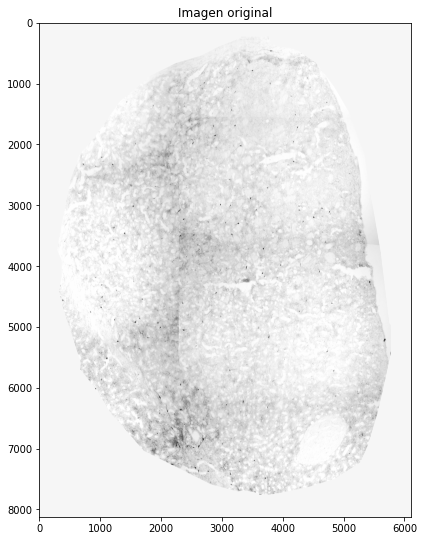

In [ ]:
img = cv2.imread('Section.tif',0)
plt.figure(figsize=(40,20))
plt.subplot(241), plt.imshow(img, "gray"), plt.title("Imagen original")

In [ ]:
#segmetacion por metodo MSER
def seg_mser(_img, area=(60,20000), min_div=0.2, max_var=0.25, delta=5, area_threshold=200):
    mser_opts = {
        #'_min_area': area[0],
        #'_max_area': area[1],
        #'_max_variation': max_var,# Podar la zona que tiene un tamaño similar al de sus hijos
        #'_min_diversity': min_div,#Rastrear para cortar la TME con una diversidad inferior a min_diversidad
        #'_delta': delta, #Controla cómo se calcula la estabilidad comparando (sizei - sizei-delta) / sizei-delta
        #'_area_threshold': area_threshold #el umbral de área para provocar la reinicialización en las imágenes en color
    }
    #_img, area=(60, 20000), min_div=0.2, max_var=0.25, delta=5, area_threshold=200

    mser = cv2.MSER_create(**mser_opts) #segmentacion
    regions, bbox = mser.detectRegions(_img) #Extractor de región extrema máximamente estable.
    
    mask = np.zeros(_img.shape)

    for dd, region in enumerate(regions):
        mask[region[:,1], region[:,0]] = 1

    label_regions, m = label(mask, connectivity=1, return_num=True)
    props = regionprops(label_regions)
    bboxes = np.array([[p.bbox[1], p.bbox[0], p.bbox[3] - p.bbox[1], p.bbox[2] - p.bbox[0]] for p in props])
    
    return mask, label_regions, bboxes

In [ ]:
def plot_bboxes(bounding_boxes, color='lawngreen', linewidth=1.5, ax=None):
  # bounding_boxes:matriz de cajas delimitadoras (x0, y0, ancho, alto), donde x0, y0 es la esquina superior izquierda.
    if not ax:
        fig, ax = plt.subplots(1, 1)

    for b, bbox in enumerate(bounding_boxes):
        rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor=color, linewidth=linewidth)
        ax.add_patch(rect)

    return ax

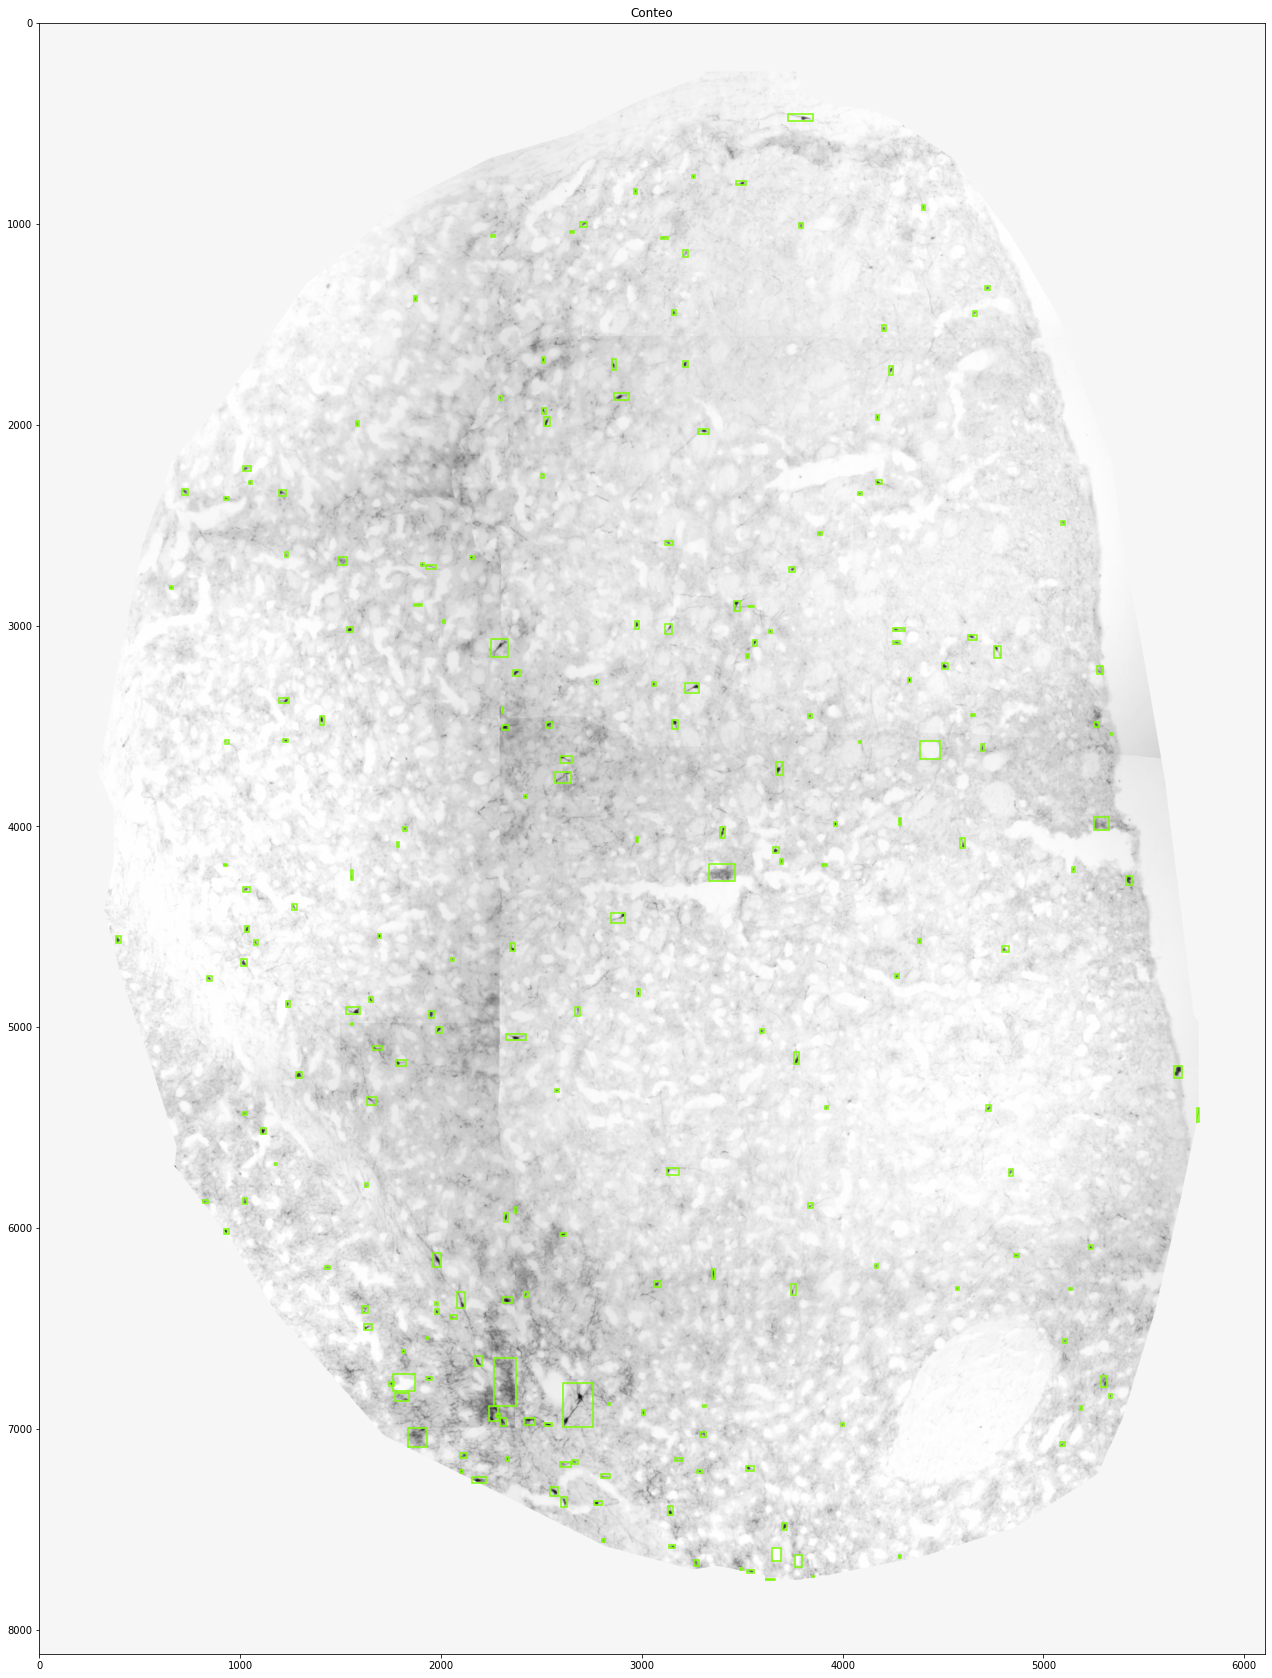

In [ ]:
mser_options = {
     'area': (100, 3000),  
    'min_div': 0.6,  
    'max_var': 0.4,  
    'delta': 10, 
}
#Redefinir valores pq no esta haciendo bien el conteo de las neuronas 
#Ver si podemos eliminar algunos recuadros

J, L, bboxes = seg_mser(img, **mser_options) #manda la imagen y las especificaciones mser

E = binary_dilation(find_boundaries(J, connectivity=1, mode='inner'))

fig4, ax4 = plt.subplots(1, 1, figsize=(30, 30))
ax4.imshow(img, cmap='gray')
ax4 = plot_bboxes(bboxes, ax=ax4)
ax4.set_title('Conteo')
plt.show()

In [ ]:
cnt=len(bboxes)
print('El conteo de neuronas son:',cnt)

El conteo de neuronas son: 15


In [ ]:
print(img.shape)

(1588, 2055)
